In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind


In [2]:
df = pd.read_excel('РАНХиГС. Микроэкономика, 2 курс - 2023-2024 уч.г..xlsx')
df = df.rename(columns={"СУММ": "Сумма за тест", "всего": "Всего баллов за кр"})

In [3]:
df

,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр
0,Азаренкова,Наталья,15.0,8.0,3.0,24,4,3,57
1,Александрова,Елизавета,8.0,4.0,23.0,20,4,15,74
2,Алексеева,Алена,5.0,0.0,20.0,13,0,0,38
3,Анисимова,Мария,2.0,0.0,0.0,1,0,1,4
4,Багайникова,Анастасия,11.0,8.0,20.0,20,4,5,68
...,...,...,...,...,...,...,...,...,...
118,Шиманская,Мария,9.0,2.0,11.0,10,0,3,35
119,Широглазов,Юрий,9.0,4.0,15.0,NaN,NaN,NaN,28
120,Широков,Илья,8.0,0.0,3.0,4,1,3,19
121,Штаненкова,Софья,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
len(df)

123

In [5]:
import pandas as pd

df['Всего баллов за кр'] = pd.to_numeric(df['Всего баллов за кр'], errors='coerce')  
df.dropna(subset=['Всего баллов за кр'], inplace=True)  
df['Всего баллов за кр'] = df['Всего баллов за кр'].astype(int) 

In [6]:
len(df)

121

In [7]:
df = df[df['Всего баллов за кр']>0]

In [8]:
df.dtypes

Фамилия                object
Имя                    object
Сумма за тест         float64
0                     float64
1                     float64
2                      object
3                      object
4                      object
Всего баллов за кр      int64
dtype: object

In [9]:
df.isna()

,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
116,False,False,False,False,False,False,False,False,False
117,False,False,False,False,False,False,False,False,False
118,False,False,False,False,False,False,False,False,False
119,False,False,False,False,False,True,True,True,False


In [10]:
nan_rows = df[df.isna().any(axis=1)]
nan_rows

,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр
11,Борщёва,Елизавета,6.0,0.0,3.0,2,6,NaN,17
12,Бражник,Ксения,10.0,0.0,14.0,13,NaN,1,38
16,Валиахметова,Алина,8.0,0.0,7.0,6,0,NaN,21
18,Василевская,Мария,15.0,0.0,0.0,0,2,NaN,17
20,Васильева,Яна,0.0,0.0,1.0,NaN,NaN,3,4
22,Волков,Иван,8.0,2.0,3.0,4,1,NaN,18
23,Галимуллина,Камилла,2.0,0.0,4.0,6,0,NaN,12
27,Голубцова,Дарья,0.0,0.0,0.0,6,5,NaN,11
36,Емельянова,Екатерина,0.0,2.0,3.0,13,0,NaN,18
40,Ибрагимова,Мадлен,8.0,0.0,0.0,NaN,0,1,9


In [11]:
df = df.fillna(0)

In [12]:
df

,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр
0,Азаренкова,Наталья,15.0,8.0,3.0,24,4,3,57
1,Александрова,Елизавета,8.0,4.0,23.0,20,4,15,74
2,Алексеева,Алена,5.0,0.0,20.0,13,0,0,38
3,Анисимова,Мария,2.0,0.0,0.0,1,0,1,4
4,Багайникова,Анастасия,11.0,8.0,20.0,20,4,5,68
...,...,...,...,...,...,...,...,...,...
116,Чечеткин,Александр,8.0,2.0,19.0,18,6,4,57
117,Шатилов,Александр,15.0,5.0,8.0,9,2,4,43
118,Шиманская,Мария,9.0,2.0,11.0,10,0,3,35
119,Широглазов,Юрий,9.0,4.0,15.0,0,0,0,28


In [13]:
group_df = pd.read_excel('группа.xlsx')
group_df

,Фамилия,Имя,Группа,Уровень
0,Алексеева,Алена,201 - база,база
1,Багайникова,Анастасия,201 - база,база
2,Басова,Мария,201 - база,база
3,Березовский,Александр,201 - база,база
4,Бородачева,Мария,201 - база,база
...,...,...,...,...
106,Чельцов,Александр,202 - углуба,углуба
107,Чеснокова,Алина,202 - углуба,углуба
108,Шулик,Анжелика,202 - углуба,углуба
109,Василевская,Мария,202 - углуба,углуба


In [14]:
merged_df = pd.merge(df, group_df, on=['Фамилия', 'Имя'], how='inner')
merged_df

,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр,Группа,Уровень
0,Азаренкова,Наталья,15.0,8.0,3.0,24,4,3,57,201 - углуба,углуба
1,Алексеева,Алена,5.0,0.0,20.0,13,0,0,38,201 - база,база
2,Анисимова,Мария,2.0,0.0,0.0,1,0,1,4,202 - база,база
3,Багайникова,Анастасия,11.0,8.0,20.0,20,4,5,68,201 - база,база
4,Басова,Мария,2.0,2.0,18.0,15,3,2,42,201 - база,база
...,...,...,...,...,...,...,...,...,...,...,...
83,Чеснокова,Алина,10.0,0.0,4.0,14,2,8,38,202 - углуба,углуба
84,Чечеткин,Александр,8.0,2.0,19.0,18,6,4,57,201 - углуба,углуба
85,Шатилов,Александр,15.0,5.0,8.0,9,2,4,43,201 - углуба,углуба
86,Широглазов,Юрий,9.0,4.0,15.0,0,0,0,28,202 - база,база


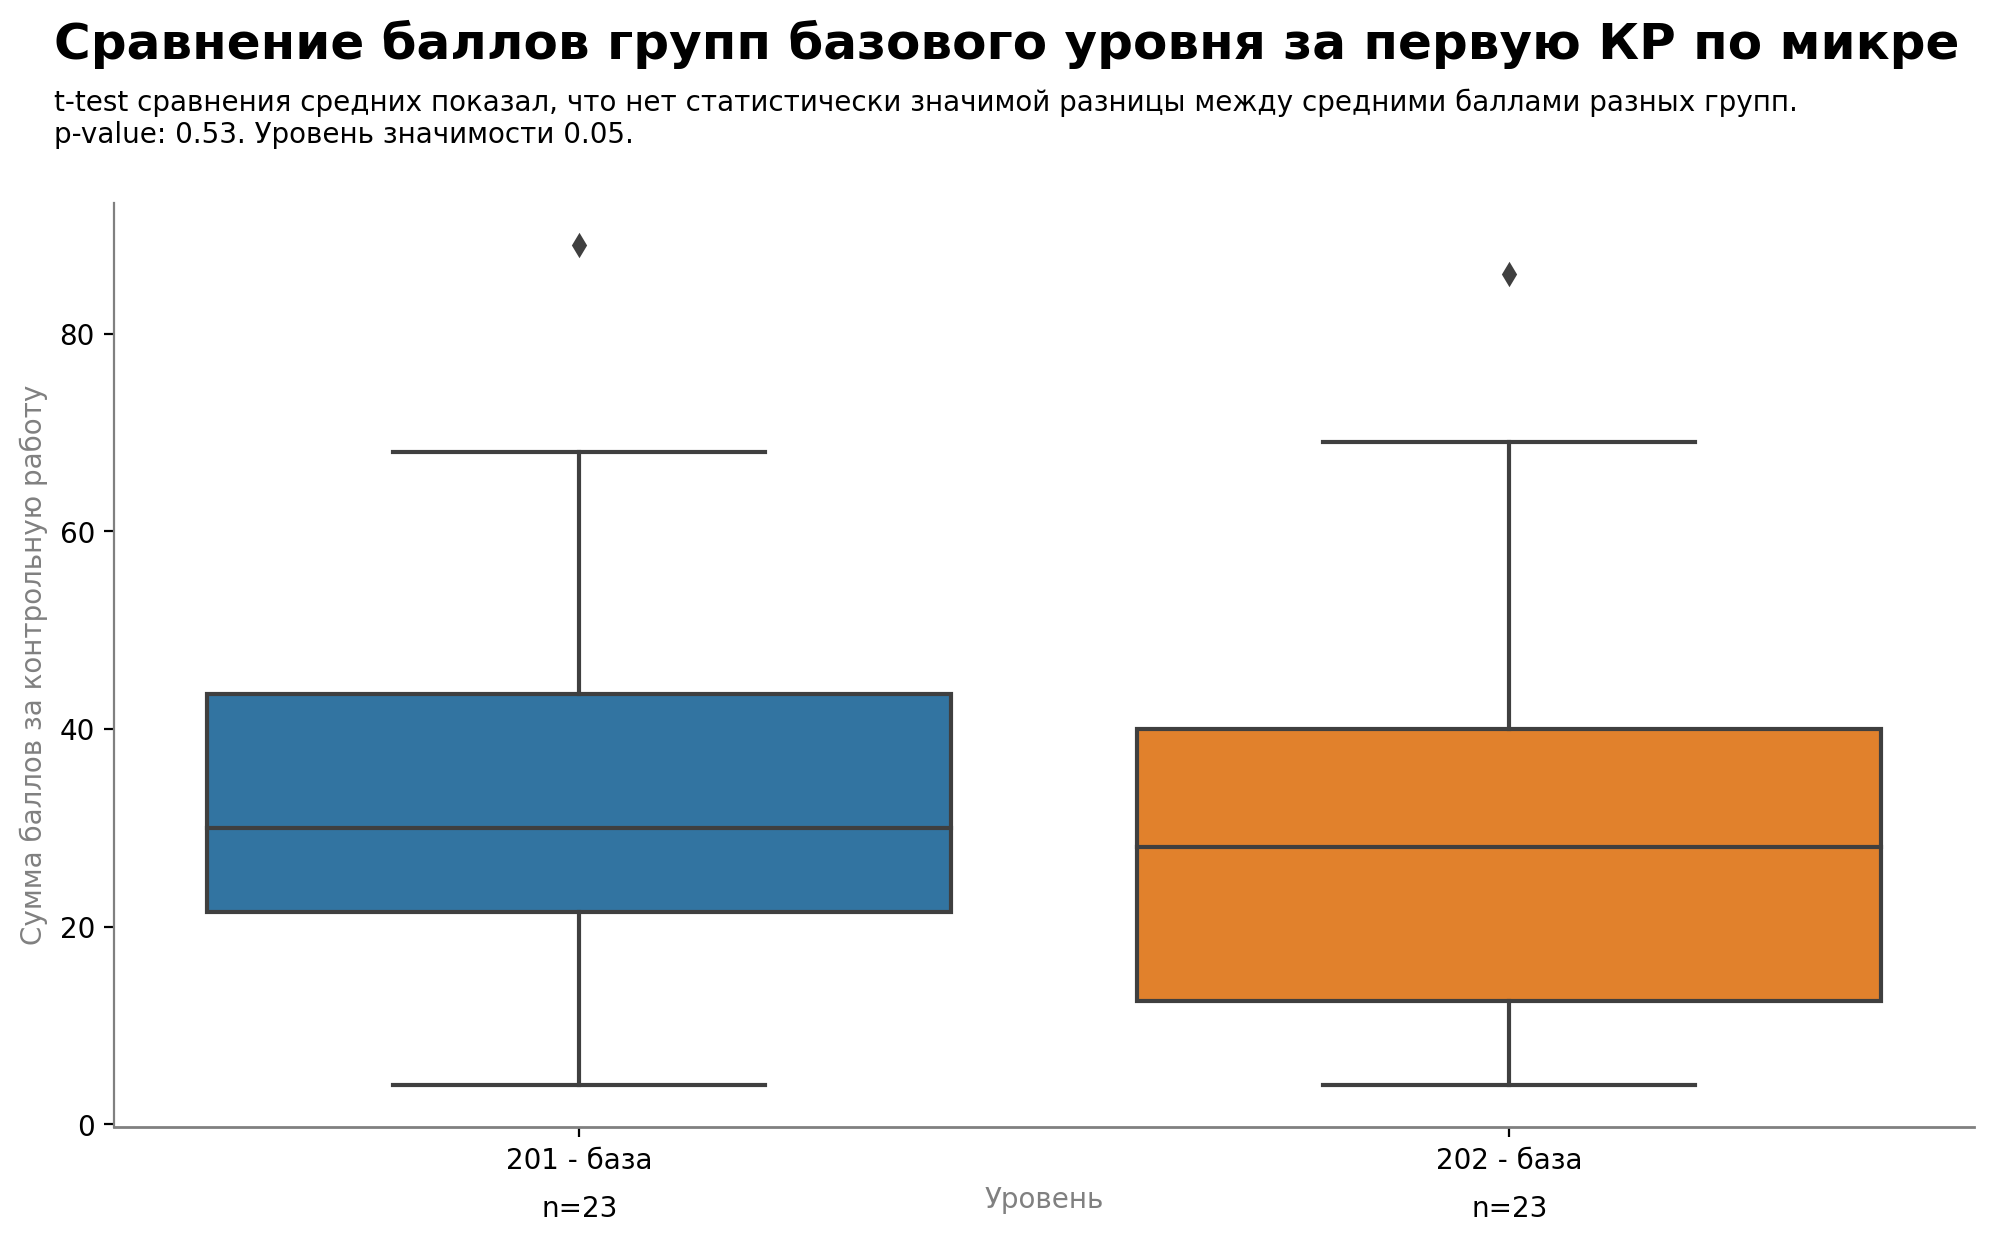

In [15]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

for direction in ax.spines:
    if direction != 'bottom' and direction != 'left':
        ax.spines[direction].set_visible(False)

ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_linewidth(1)


fig.text(
    s='Сравнение баллов групп базового уровня за первую КР по микре',
    x=0.1, y=1, 
    fontdict={'size': 18, 'weight': 'bold'}
)

fig.text(
    s='''t-test сравнения средних показал, что нет статистически значимой разницы между средними баллами разных групп. 
p-value: 0.53. Уровень значимости 0.05.''',
    x=0.1, y=0.93, 
    fontdict={'size': 10, 'weight': 'medium'}
)

# Create the boxplot

ax = sns.boxplot(x='Группа', y='Всего баллов за кр', data=merged_df[merged_df['Уровень']=='база'], showfliers=True)

# Add labels for the number of elements in each group
for i, group in enumerate(merged_df[merged_df['Уровень']=='база']['Группа'].unique()):
    count = merged_df[merged_df['Группа'] == group]['Всего баллов за кр'].count()
    ax.text(i, -10, f'n={count}', ha='center', va='bottom', color='black', fontsize=10)

ax.set_ylabel('Сумма баллов за контрольную работу', color='grey')
ax.set_xlabel('Уровень', color='grey')

plt.show()



In [16]:
# Select the data for the two groups
group1_data = merged_df[merged_df['Группа'] == '201 - база']['Всего баллов за кр']
group2_data = merged_df[merged_df['Группа'] == '202 - база']['Всего баллов за кр']

# Perform the t-test
t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.")

T-Statistic: 0.626987776644118
P-Value: 0.5339072855536966
Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.


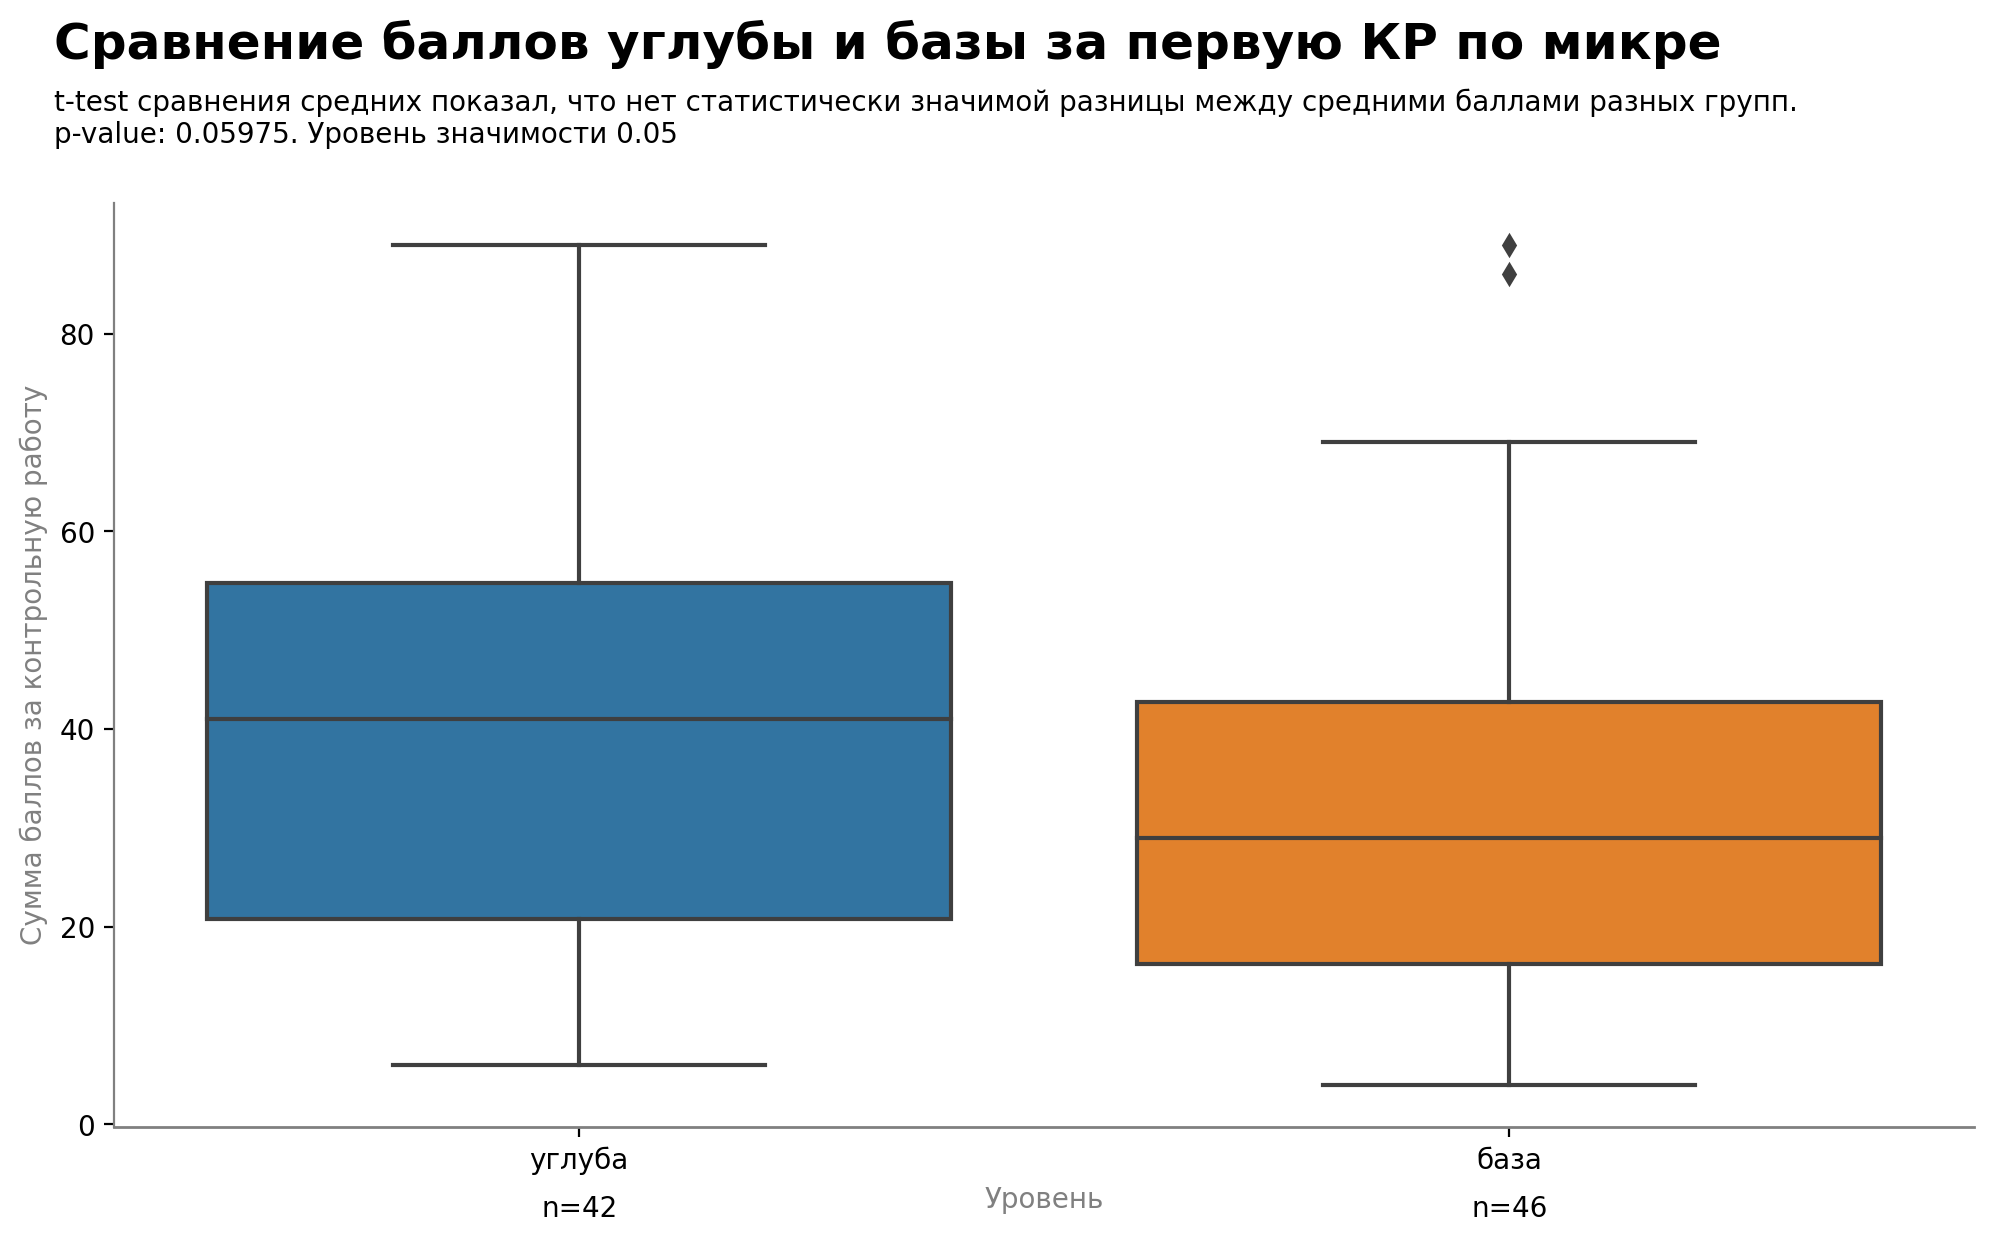

In [17]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

for direction in ax.spines:
    if direction != 'bottom' and direction != 'left':
        ax.spines[direction].set_visible(False)

ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_linewidth(1)


fig.text(
    s='Сравнение баллов углубы и базы за первую КР по микре',
    x=0.1, y=1, 
    fontdict={'size': 18, 'weight': 'bold'}
)

fig.text(
    s='''t-test сравнения средних показал, что нет статистически значимой разницы между средними баллами разных групп. 
p-value: 0.05975. Уровень значимости 0.05''',
    x=0.1, y=0.93, 
    fontdict={'size': 10, 'weight': 'medium'}
)

# Create the boxplot

ax = sns.boxplot(x='Уровень', y='Всего баллов за кр', data=merged_df, showfliers=True)

# Add labels for the number of elements in each group
for i, group in enumerate(merged_df['Уровень'].unique()):
    count = merged_df[merged_df['Уровень'] == group]['Всего баллов за кр'].count()
    ax.text(i, -10, f'n={count}', ha='center', va='bottom', color='black', fontsize=10)

ax.set_ylabel('Сумма баллов за контрольную работу', color='grey')
ax.set_xlabel('Уровень', color='grey')

plt.show()



In [18]:
# Select the data for the two groups
group1_data = merged_df[merged_df['Уровень'] == 'база']['Всего баллов за кр']
group2_data = merged_df[merged_df['Уровень'] == 'углуба']['Всего баллов за кр']

# Perform the t-test
t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.")

T-Statistic: -1.907763654322561
P-Value: 0.05975895685060603
Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.


In [19]:
len(merged_df)

88

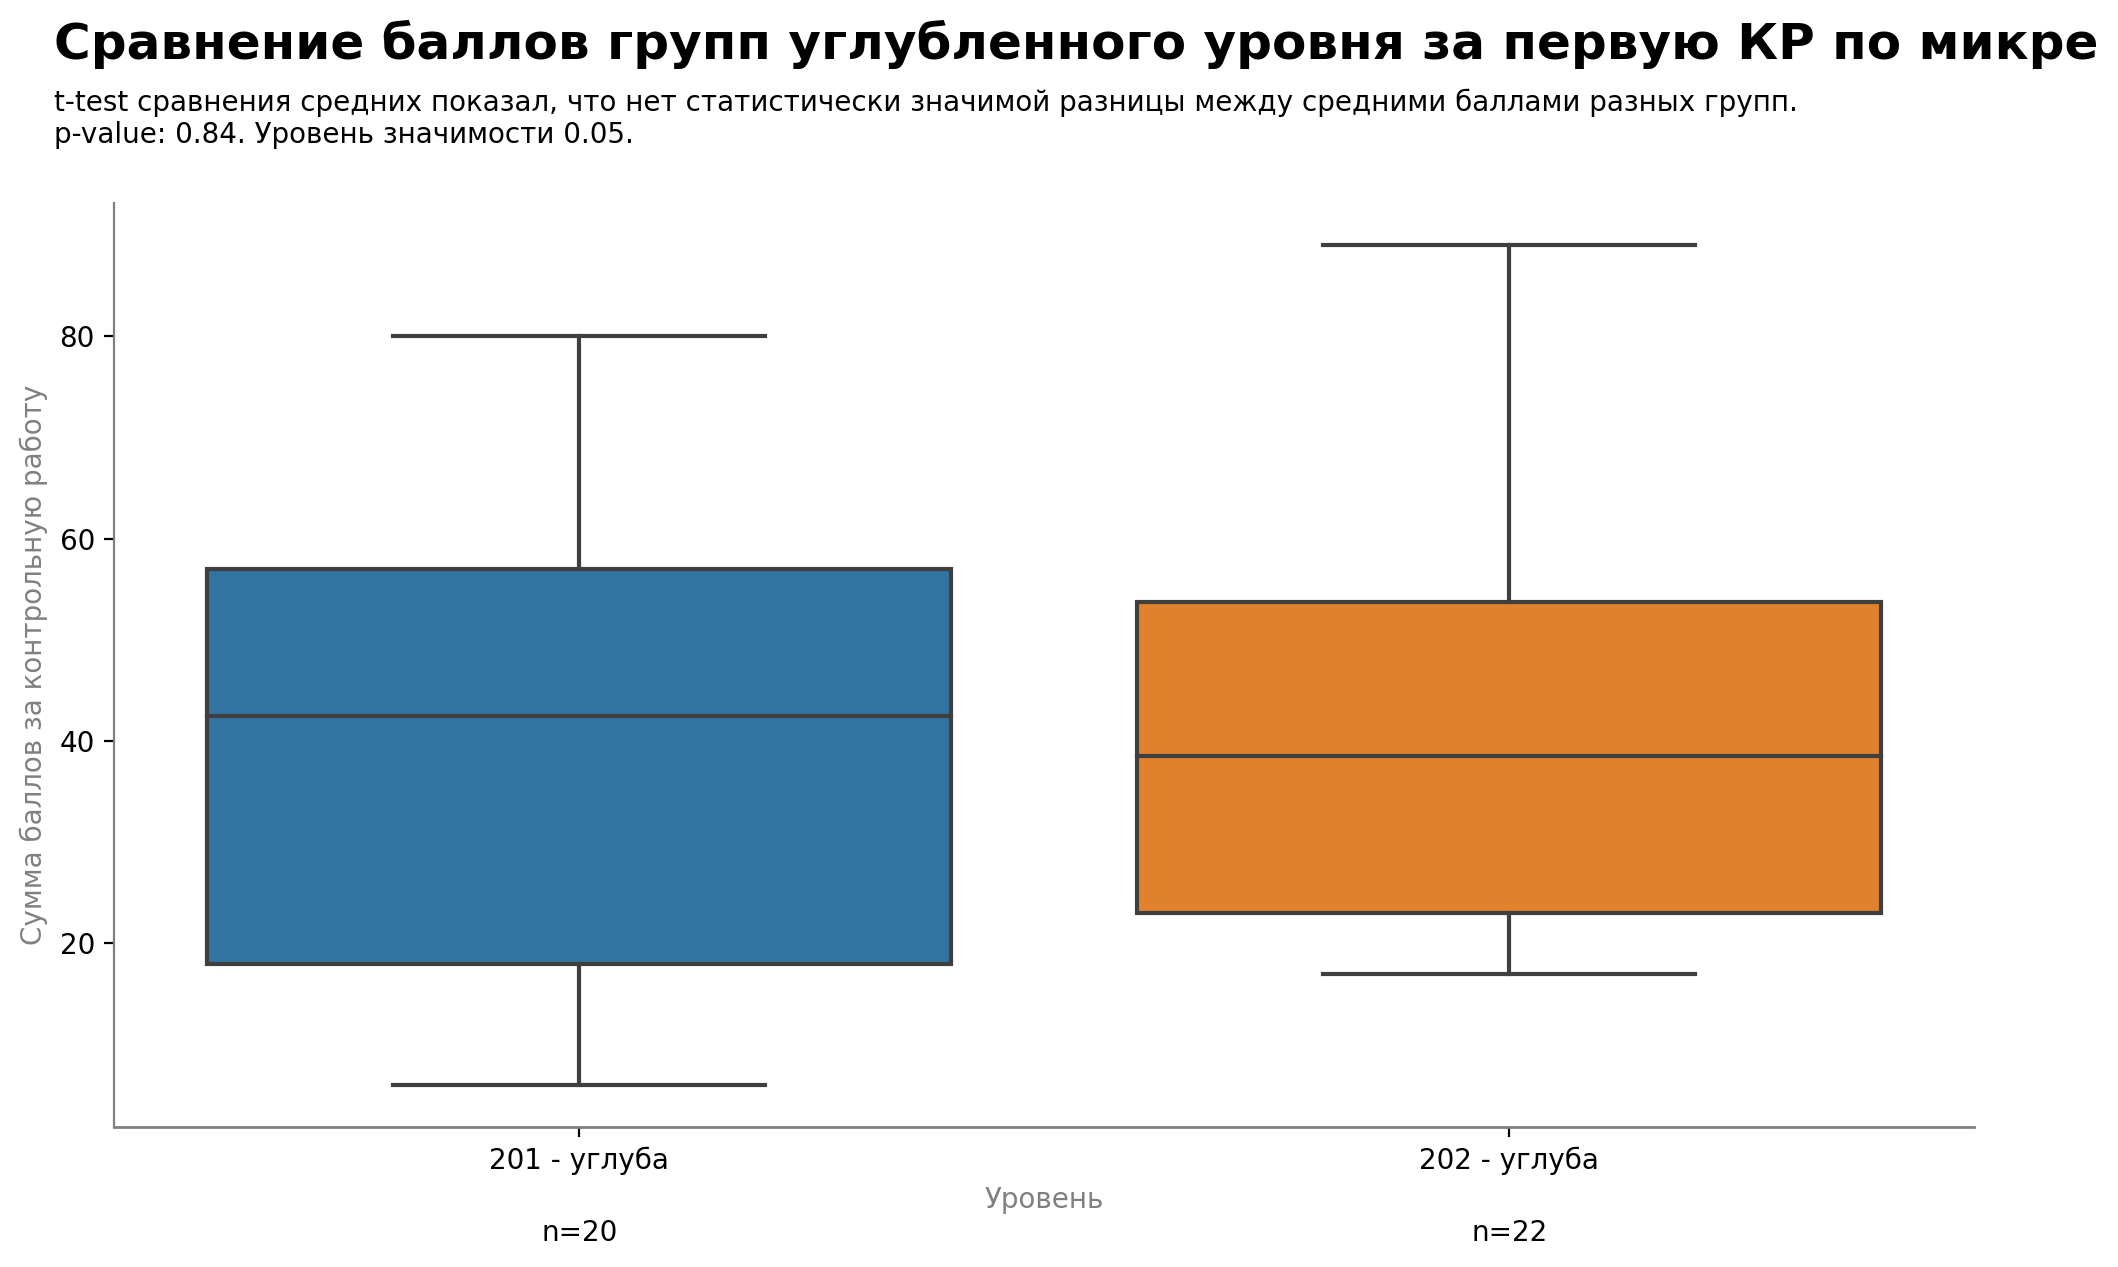

In [20]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

for direction in ax.spines:
    if direction != 'bottom' and direction != 'left':
        ax.spines[direction].set_visible(False)

ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_linewidth(1)


fig.text(
    s='Сравнение баллов групп углубленного уровня за первую КР по микре',
    x=0.1, y=1, 
    fontdict={'size': 18, 'weight': 'bold'}
)

fig.text(
    s='''t-test сравнения средних показал, что нет статистически значимой разницы между средними баллами разных групп. 
p-value: 0.84. Уровень значимости 0.05.''',
    x=0.1, y=0.93, 
    fontdict={'size': 10, 'weight': 'medium'}
)

# Create the boxplot

ax = sns.boxplot(x='Группа', y='Всего баллов за кр', data=merged_df[merged_df['Уровень']=='углуба'], showfliers=True)

# Add labels for the number of elements in each group
for i, group in enumerate(merged_df[merged_df['Уровень']=='углуба']['Группа'].unique()):
    count = merged_df[merged_df['Группа'] == group]['Всего баллов за кр'].count()
    ax.text(i, -10, f'n={count}', ha='center', va='bottom', color='black', fontsize=10)

ax.set_ylabel('Сумма баллов за контрольную работу', color='grey')
ax.set_xlabel('Уровень', color='grey')

plt.show()



In [21]:
# Select the data for the two groups
group1_data = merged_df[merged_df['Группа'] == '201 - углуба']['Всего баллов за кр']
group2_data = merged_df[merged_df['Группа'] == '202 - углуба']['Всего баллов за кр']

# Perform the t-test
t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.")

T-Statistic: 0.1969419580144601
P-Value: 0.8448702535941383
Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.


In [22]:
merged_df_0 = merged_df.copy()

In [23]:
merged_df_0['0'] = pd.to_numeric(merged_df_0['0'], errors='coerce')  
merged_df_0.dropna(subset=['0'], inplace=True)  
merged_df_0['Всего баллов за кр'] = df['0'].astype(int) 

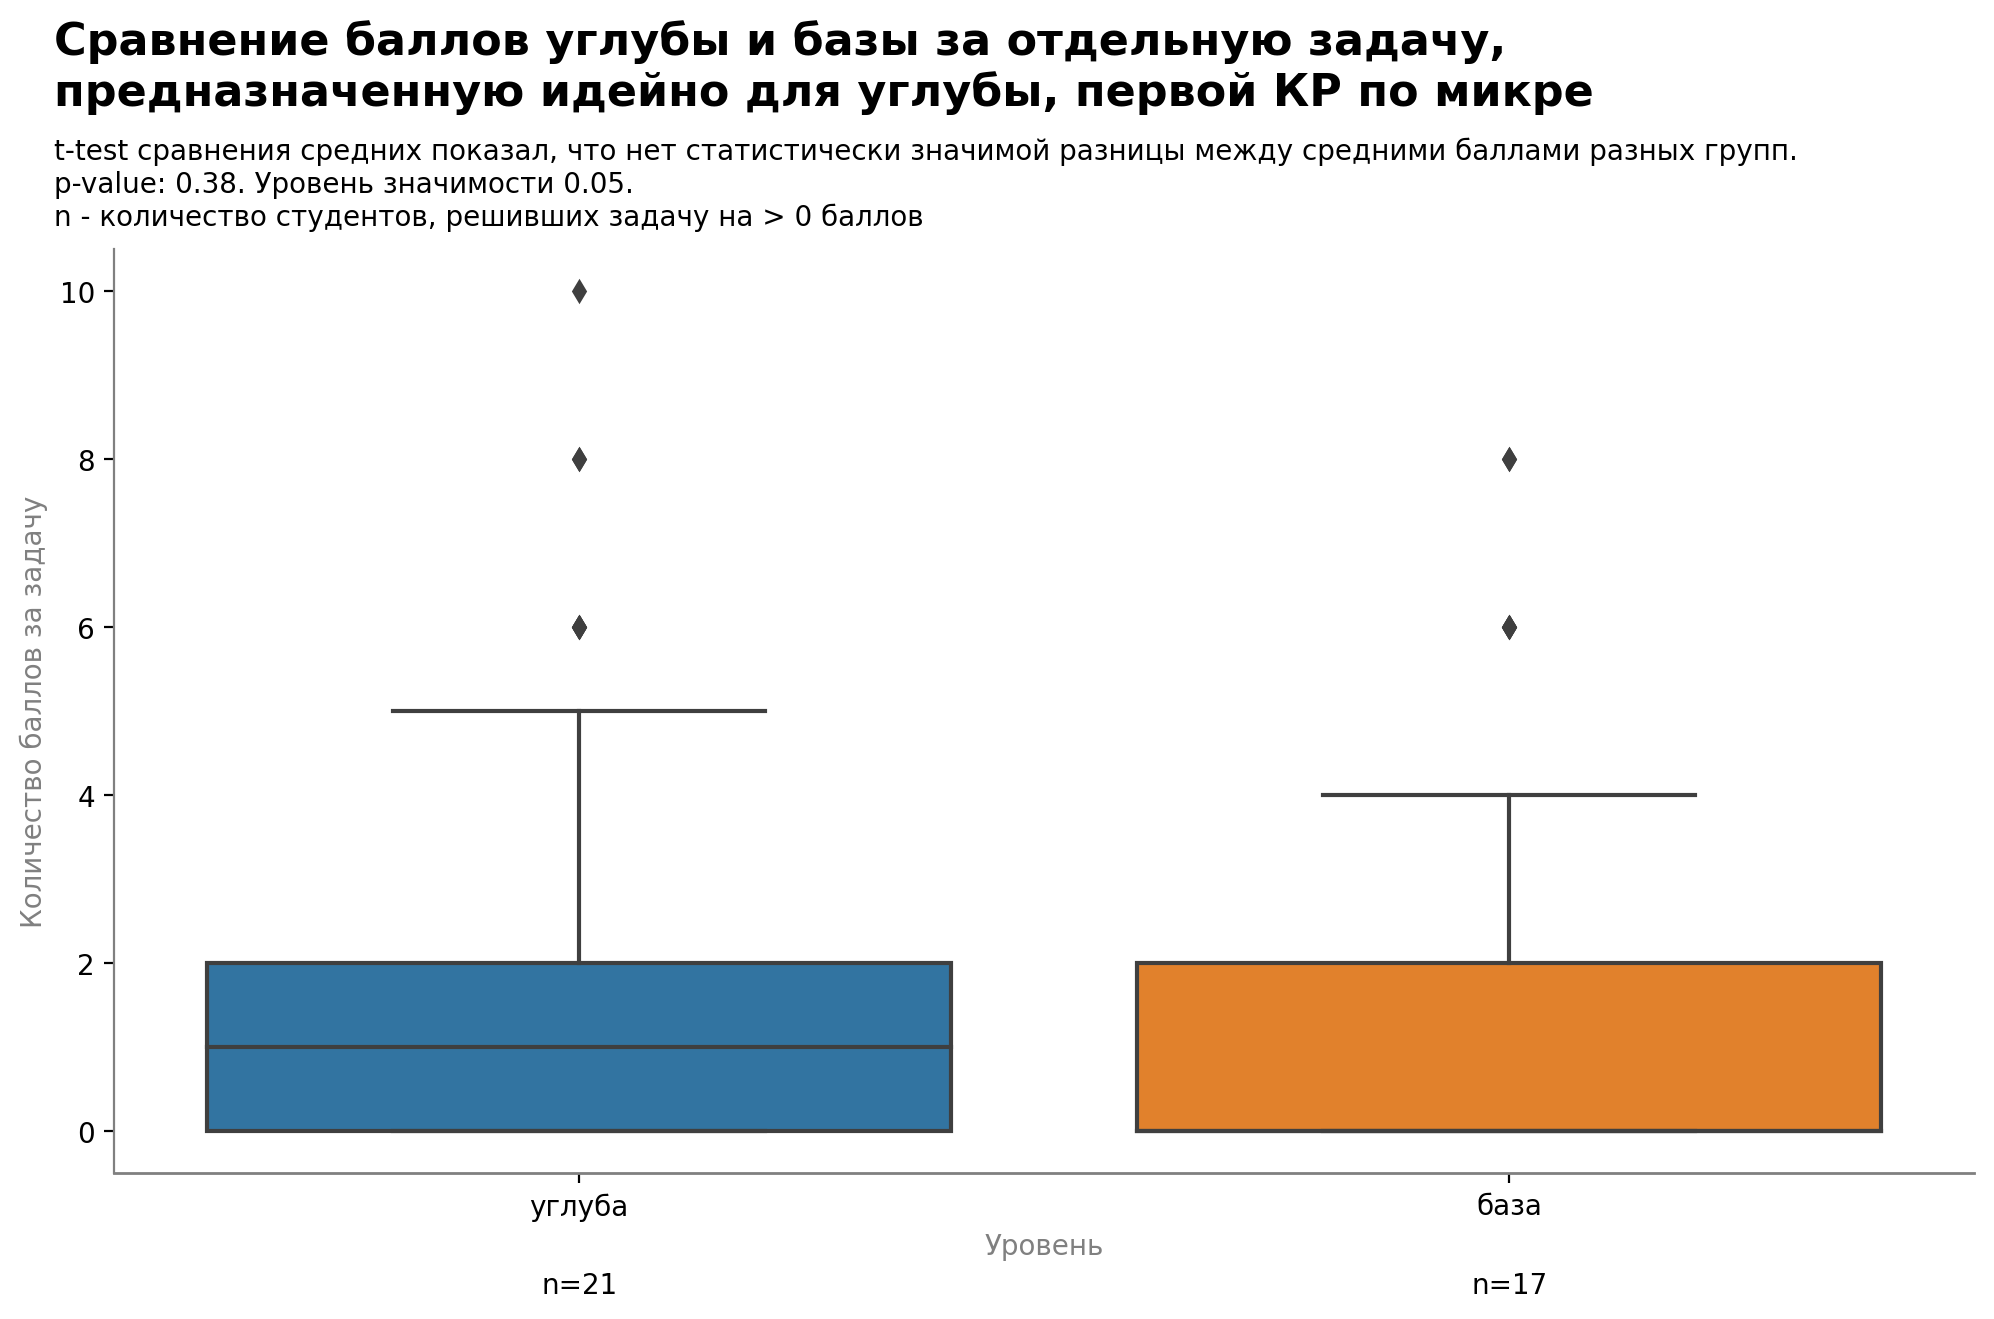

In [24]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)

for direction in ax.spines:
    if direction != 'bottom' and direction != 'left':
        ax.spines[direction].set_visible(False)

ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')
ax.spines['bottom'].set_linewidth(1)


fig.text(
    s='''Сравнение баллов углубы и базы за отдельную задачу, 
предназначенную идейно для углубы, первой КР по микре''',
    x=0.1, y=1, 
    fontdict={'size': 16, 'weight': 'bold'}
)

fig.text(
    s='''t-test сравнения средних показал, что нет статистически значимой разницы между средними баллами разных групп. 
p-value: 0.38. Уровень значимости 0.05. 
n - количество студентов, решивших задачу на > 0 баллов''',
    x=0.1, y=0.9, 
    fontdict={'size': 10, 'weight': 'medium'}
)

# Create the boxplot

ax = sns.boxplot(x='Уровень', y='0', data=merged_df_0, showfliers=True)

# Add labels for the number of elements in each group
for i, group in enumerate(merged_df_0['Уровень'].unique()):
    count = merged_df_0[(merged_df_0['Уровень'] == group) & ((merged_df_0['0'] > 0))]['0'].count()
    ax.text(i, -2, f'n={count}', ha='center', va='bottom', color='black', fontsize=10)

ax.set_ylabel('Количество баллов за задачу', color='grey')
ax.set_xlabel('Уровень', color='grey')

plt.show()



In [25]:
# Select the data for the two groups
group1_data = merged_df[merged_df['Уровень'] == 'база']['0']
group2_data = merged_df[merged_df['Уровень'] == 'углуба']['0']

# Perform the t-test
t_statistic, p_value = ttest_ind(group1_data, group2_data)

# Display the results
print(f'T-Statistic: {t_statistic}')
print(f'P-Value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the means of the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.")

T-Statistic: -0.8785860834029444
P-Value: 0.3820738955408517
Fail to reject the null hypothesis. There is no significant difference between the means of the two groups.


In [26]:
merged_df_0[(merged_df_0['Уровень'] == 'база') & ((merged_df_0['0'] > 0))]

,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр,Группа,Уровень
3,Багайникова,Анастасия,11.0,8.0,20.0,20,4,5,0.0,201 - база,база
4,Басова,Мария,2.0,2.0,18.0,15,3,2,8.0,201 - база,база
6,Бирюкова,Алёна,8.0,4.0,13.0,13,0,3,2.0,202 - база,база
11,Василенко,Анна,5.0,6.0,20.0,12,0,6,0.0,201 - база,база
25,Данильченко,Виктория,6.0,4.0,21.0,22,1,3,2.0,202 - база,база
28,Емельянова,Екатерина,0.0,2.0,3.0,13,0,0,4.0,201 - база,база
32,Иванов,Пётр,13.0,6.0,24.0,24,6,16,NaN,201 - база,база
36,Карандей,Виктория,2.0,2.0,3.0,5,3,8,2.0,201 - база,база
41,Королев,Сергей,6.0,4.0,0.0,0,1,1,6.0,201 - база,база
42,Королева,Виктория,10.0,2.0,3.0,12,0,3,8.0,201 - база,база


In [27]:
merged_df_0[(merged_df_0['Уровень'] == 'углуба') & ((merged_df_0['0'] > 0))]

,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр,Группа,Уровень
0,Азаренкова,Наталья,15.0,8.0,3.0,24,4,3,8.0,201 - углуба,углуба
5,Басова,Мария,2.0,2.0,18.0,15,3,2,2.0,202 - углуба,углуба
14,Волков,Иван,8.0,2.0,3.0,4,1,0,0.0,201 - углуба,углуба
16,Гизатуллин,Искандар,15.0,2.0,19.0,20,3,3,0.0,202 - углуба,углуба
17,Голубева,Валерия,15.0,2.0,3.0,10,1,3,0.0,202 - углуба,углуба
21,Гранков,Георгий,9.0,4.0,21.0,23,5,18,0.0,201 - углуба,углуба
29,Емельянова,Екатерина,0.0,2.0,3.0,13,0,0,0.0,202 - углуба,углуба
33,Иванов,Пётр,13.0,6.0,24.0,24,6,16,4.0,202 - углуба,углуба
34,Иванова,Светлана,13.0,8.0,3.0,22,4,2,0.0,201 - углуба,углуба
35,Иванченко,Святослав,10.0,6.0,3.0,16,0,18,0.0,201 - углуба,углуба


In [28]:
merged_df[merged_df['Уровень'] == 'база']['0'].mean()

1.565217391304348

In [29]:
merged_df[merged_df['Уровень'] == 'углуба']['0'].mean()

2.0476190476190474

In [30]:
merged_df[merged_df['Уровень'] == 'база']

,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр,Группа,Уровень
1,Алексеева,Алена,5.0,0.0,20.0,13,0,0,38,201 - база,база
2,Анисимова,Мария,2.0,0.0,0.0,1,0,1,4,202 - база,база
3,Багайникова,Анастасия,11.0,8.0,20.0,20,4,5,68,201 - база,база
4,Басова,Мария,2.0,2.0,18.0,15,3,2,42,201 - база,база
6,Бирюкова,Алёна,8.0,4.0,13.0,13,0,3,41,202 - база,база
7,Бородачева,Мария,9.0,0.0,23.0,8,0,4,44,201 - база,база
9,Бузмаков,Григорий,4.0,0.0,2.0,8,0,6,20,201 - база,база
11,Василенко,Анна,5.0,6.0,20.0,12,0,6,49,201 - база,база
12,Васильева,Яна,0.0,0.0,1.0,0,0,3,4,201 - база,база
13,Веткасов,Арсений,12.0,0.0,11.0,0,2,5,30,201 - база,база


In [31]:
merged_df[merged_df['Уровень'] == 'база']['Всего баллов за кр']

1     38
2      4
3     68
4     42
6     41
7     44
9     20
11    49
12     4
13    30
15    12
18    27
22    68
24    35
25    57
26     7
27    44
28    18
30    25
31     9
32    89
36    23
39    14
41    12
42    30
44    43
47    12
49    34
50    28
56    16
59    34
60    11
62    28
63    17
65    38
66    69
67    86
70    57
71     8
72     8
73    21
75    52
77    23
80    39
82    38
86    28
Name: Всего баллов за кр, dtype: int64

In [32]:

from sklearn.preprocessing import MinMaxScaler

# Assuming merged_df is your DataFrame
# Assuming 'Уровень' and 'Всего баллов за кр' are the column names

# Select the data for the specified level ('база')
base_level_data = merged_df[merged_df['Уровень'] == 'база']['Всего баллов за кр']


# Use MinMaxScaler to normalize the data to a range from 1 to 10
scaler = MinMaxScaler(feature_range=(2, 10))
normalized_data = scaler.fit_transform(base_level_data.values.reshape(-1, 1))

# Add the 'Оценка' column to the DataFrame
merged_df['Оценка'] = None  # Create a new column with None values
merged_df.loc[merged_df['Уровень'] == 'база', 'Оценка'] = normalized_data

# Display the DataFrame with the new 'Оценка' column
merged_df


,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр,Группа,Уровень,Оценка
0,Азаренкова,Наталья,15.0,8.0,3.0,24,4,3,57,201 - углуба,углуба,None
1,Алексеева,Алена,5.0,0.0,20.0,13,0,0,38,201 - база,база,5.2
2,Анисимова,Мария,2.0,0.0,0.0,1,0,1,4,202 - база,база,2.0
3,Багайникова,Анастасия,11.0,8.0,20.0,20,4,5,68,201 - база,база,8.023529
4,Басова,Мария,2.0,2.0,18.0,15,3,2,42,201 - база,база,5.576471
...,...,...,...,...,...,...,...,...,...,...,...,...
83,Чеснокова,Алина,10.0,0.0,4.0,14,2,8,38,202 - углуба,углуба,None
84,Чечеткин,Александр,8.0,2.0,19.0,18,6,4,57,201 - углуба,углуба,None
85,Шатилов,Александр,15.0,5.0,8.0,9,2,4,43,201 - углуба,углуба,None
86,Широглазов,Юрий,9.0,4.0,15.0,0,0,0,28,202 - база,база,4.258824


In [33]:
merged_df[merged_df['Фамилия']=='Ляра']

,Фамилия,Имя,Сумма за тест,0,1,2,3,4,Всего баллов за кр,Группа,Уровень,Оценка
47,Ляра,Максим,2.0,0.0,5.0,2,0,3,12,201 - база,база,2.752941


In [34]:
grade_thresholds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Display the starting scores for each grade
for i in range(3, 11):
    start_score = merged_df[merged_df['Оценка'] >= grade_thresholds[i-1]]['Всего баллов за кр'].min()
    print(f'Оценка {i} начинается с {start_score} баллов')

Оценка 3 начинается с 4 баллов
Оценка 4 начинается с 16 баллов
Оценка 5 начинается с 27 баллов
Оценка 6 начинается с 38 баллов
Оценка 7 начинается с 49 баллов
Оценка 8 начинается с 68 баллов
Оценка 9 начинается с 68 баллов
Оценка 10 начинается с 86 баллов
